# Business Applications Development
### Assignment 8: Data Analysis and Visualization
Please complete these exercises to the best of your abilities. Please include code to invoke each of your programs to demonstrate the functionality. Write comments throughout your code to explain steps. If you run into a persistent error, please demonstrate your efforts to resolve it; search the web for the error, see if you can get closer to figuring it out. Document what you tried in order to fix the problem.

### Extra tests
Please note that it is critical to reference the function parameters rather than the sample data. The autotests will check to make sure your functions operate correctly on new data collections and variables. 

In [46]:
# Suppress warnings -- removes messages that clutter the output
import warnings
warnings.filterwarnings("ignore")

### Problem 1:  Importing data and creating a data frame  
#### Use the gapminder data for problems 1-5
a. Import data from a url containing csv data of the form seen here: http://bit.ly/2cLzoxH and create a pandas data frame and examine the first 6 lines of the data set.  

c.  Sort the data frame by decreasing life expectancy and print the first 6 lines of the sorted dataframe.

In [47]:
def gm_data(data_source):
    ## Import necessary libraries
    import pandas as pd

    # a. Import the data and create a dataframe 
    gm=pd.read_csv(data_source).round(decimals=2)
    print(gm.head(),'\n')

    # c.  Sort the data frame by decreasing life expectancy  
    gm_sorted=gm.sort_values('lifeExp', ascending=False)
    print(gm_sorted.head())

In [48]:
# Run the function on the following data
data_url = 'http://bit.ly/2cLzoxH' 

gm_data(data_url)

       country  year         pop continent  lifeExp  gdpPercap
0  Afghanistan  1952   8425333.0      Asia    28.80     779.45
1  Afghanistan  1957   9240934.0      Asia    30.33     820.85
2  Afghanistan  1962  10267083.0      Asia    32.00     853.10
3  Afghanistan  1967  11537966.0      Asia    34.02     836.20
4  Afghanistan  1972  13079460.0      Asia    36.09     739.98 

              country  year          pop continent  lifeExp  gdpPercap
803             Japan  2007  127467972.0      Asia    82.60   31656.07
671   Hong Kong China  2007    6980412.0      Asia    82.21   39724.98
802             Japan  2002  127065841.0      Asia    82.00   28604.59
695           Iceland  2007     301931.0    Europe    81.76   36180.79
1487      Switzerland  2007    7554661.0    Europe    81.70   37506.42


Expected Output
```
       country  year         pop continent  lifeExp  gdpPercap
0  Afghanistan  1952   8425333.0      Asia    28.80     779.45
1  Afghanistan  1957   9240934.0      Asia    30.33     820.85
2  Afghanistan  1962  10267083.0      Asia    32.00     853.10
3  Afghanistan  1967  11537966.0      Asia    34.02     836.20
4  Afghanistan  1972  13079460.0      Asia    36.09     739.98 

              country  year          pop continent  lifeExp  gdpPercap
803             Japan  2007  127467972.0      Asia    82.60   31656.07
671   Hong Kong China  2007    6980412.0      Asia    82.21   39724.98
802             Japan  2002  127065841.0      Asia    82.00   28604.59
695           Iceland  2007     301931.0    Europe    81.76   36180.79
1487      Switzerland  2007    7554661.0    Europe    81.70   37506.42
```

### Problem 2:  Filtering, Summarizing, and Visualizing Distributions
Build a function to select gapminder data from a specific year and perform some summary and visualization tasks. 

a.  Select data from a specific year using ```y``` as the second function parameter. 

b.  Find a statistical summary of the data from the selected year.

c.  Create one histogram for GDP and one for Life Expectancy for the selected year. 

d.  Create parallel boxplots to show the distributions of GDP by continent for the selected year. 


In [49]:
def exploring_data(data_source, y):
    ## Import necessary libraries
    import pandas as pd
    import matplotlib.pyplot as plt
    %matplotlib inline
    import seaborn as sns

    # import the data as a dataframe called gm
    gm=pd.read_csv(data_source)

    # a.  Select data from year y
    y=int(y)
    gm_y=gm[gm['year']==y]

    # b.  Find a statistical summary of the data from selected year
    summary=gm_y.describe().round(decimals=2)
    print(summary)

    # c.  Create one histogram for GDP and one for Life Expectancy
    gdp_hist = plt.hist(gm_y['gdpPercap'])
    plt.title('GDP Per Capita in Countries of the World, %s'%y)
    plt.xlabel('GDP per Capita (USD)')
    plt.ylabel('Number of Countries')
    plt.show()
    
    exp_hist = plt.hist(gm_y['gdpPercap'])
    plt.title('Life Expectancy in Countries of the World, %s'%y)
    plt.xlabel('Life Expectancy (years)')
    plt.ylabel('Number of Countries')
    plt.show()
    

    # d.  Create parallel boxplots to show the distributions of GDP within each continent
    sns.boxplot(gm_y['continent'], gm_y['gdpPercap'], palette='rocket')


         year           pop  lifeExp  gdpPercap
count   142.0  1.420000e+02   142.00     142.00
mean   2002.0  4.145759e+07    65.69    9917.85
std       0.0  1.408483e+08    12.28   11154.11
min    2002.0  1.703720e+05    39.19     241.17
25%    2002.0  4.173506e+06    55.52    1409.57
50%    2002.0  1.037292e+07    70.83    5319.80
75%    2002.0  2.654556e+07    75.46   13359.51
max    2002.0  1.280400e+09    82.00   44683.98


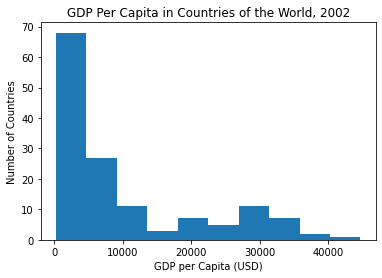

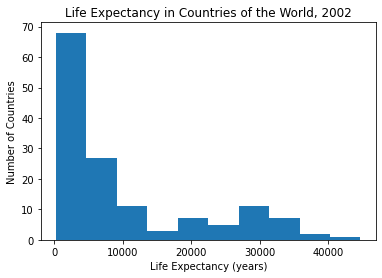

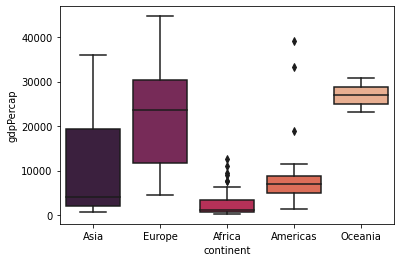

In [50]:
# Run the function on the following data
data_url = 'http://bit.ly/2cLzoxH' 
exploring_data(data_url,2002)

Expected Output
```
         year           pop  lifeExp  gdpPercap
count   142.0  1.420000e+02   142.00     142.00
mean   2002.0  4.145759e+07    65.69    9917.85
std       0.0  1.408483e+08    12.28   11154.11
min    2002.0  1.703720e+05    39.19     241.17
25%    2002.0  4.173506e+06    55.52    1409.57
50%    2002.0  1.037292e+07    70.83    5319.80
75%    2002.0  2.654556e+07    75.46   13359.51
max    2002.0  1.280400e+09    82.00   44683.98
```

![graphic](https://drive.google.com/uc?id=1OAqnY9Ia-pHgxiMH_4OV-vnmpkqYQENx)


### Problem 3:  Pivot Table
Create a pivot table that summarizes the gdp by year (rows) and continent (columns) based on an aggregating function such as median, maximum, etc. The function should accept the data source and the aggregating function as arguments. 


In [51]:
def pivot_table(data_source,opp):
    ## Import necessary libraries
    import pandas as pd

    # import the data as a dataframe called gm
    gm=pd.read_csv(data_source)

    # Code: 
    # First, create a dataframe with the columns continent, year, and gdpPercap
    df=gm[['continent', 'year', 'gdpPercap']]
    pt=pd.pivot_table(df, values= 'gdpPercap',
                index=['year'],
                columns='continent',
                aggfunc=opp).round(decimals=2) # equals the second function parameter
    
    return(pt)

In [52]:
# Run the function on the following data
data_url = 'http://bit.ly/2cLzoxH' 
operation='median'
pivot_table(data_url,operation)

continent,Africa,Americas,Asia,Europe,Oceania
year,,,,,
1952,987.03,3048.30,1206.95,5142.47,10298.09
1957,1024.02,3780.55,1547.94,6066.72,11598.52
1962,1133.78,4086.11,1649.55,7515.73,12696.45
1967,1210.38,4643.39,2029.23,9366.07,14495.02
1972,1443.37,5305.45,2571.42,12326.38,16417.33
1977,1399.64,6281.29,3195.48,14225.75,17283.96
1982,1323.73,6434.50,4106.53,15322.82,18554.71
1987,1219.59,6360.94,4106.49,16215.49,20448.04
1992,1161.63,6618.74,3726.06,17550.16,20894.05


Expected Output
```
continent	Africa	Americas	Asia	Europe	Oceania
year					
1952	987.03	3048.30	1206.95	5142.47	10298.09
1957	1024.02	3780.55	1547.94	6066.72	11598.52
1962	1133.78	4086.11	1649.55	7515.73	12696.45
1967	1210.38	4643.39	2029.23	9366.07	14495.02
1972	1443.37	5305.45	2571.42	12326.38	16417.33
1977	1399.64	6281.29	3195.48	14225.75	17283.96
1982	1323.73	6434.50	4106.53	15322.82	18554.71
1987	1219.59	6360.94	4106.49	16215.49	20448.04
1992	1161.63	6618.74	3726.06	17550.16	20894.05
1997	1179.88	7113.69	3645.38	19596.50	24024.18
2002	1215.68	6994.77	4090.93	23674.86	26938.78
2007	1452.27	8948.10	4471.06	28054.07	29810.19
```

### Problem 4:  Filtering by Country and Plotting Over Time
This function will examine the trends in GDP over the years and allow for variable input of countries in that the second argument of the function is a list of countries. 

a.  Select data for all years, but only for a list of countries, for example ```['US', 'China', 'United Kingdom', 'Brazil', 'India']```. Examine the first 6 rows of the data frame. 

b.  Create a plot of GDP over time for the selected countries (include labels). 


In [53]:
def time_series(data_source, ct_lst):
    ## Import necessary libraries
    import matplotlib.pyplot as plt
    %matplotlib inline
    import pandas as pd

    # import the data as a dataframe called gm
    gm=pd.read_csv(data_source)

    # a. Select the data for the specified countries

    countries=gm[gm['country'].isin(ct_lst)] # replace the ---- with the second function parameter
    countries.head()

    # b. Create a pivot table where each column is one of the countries and the rows are the years
    p_table=pd.pivot_table(countries,
                            values='gdpPercap',
                            index='year',
                            columns='country'
    ).round(decimals=2)

    # View the top of the dataframe
    print(p_table.head(),'\n')

    # c. Create the time series plot of the pivot table                 
    plt.plot(p_table,)
    plt.legend(ct_lst)


country   Brazil   China   India  United Kingdom  United States
year                                                           
1952     2108.94  400.45  546.57         9979.51       13990.48
1957     2487.37  575.99  590.06        11283.18       14847.13
1962     3336.59  487.67  658.35        12477.18       16173.15
1967     3429.86  612.71  700.77        14142.85       19530.37
1972     4985.71  676.90  724.03        15895.12       21806.04 



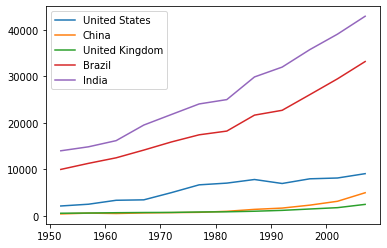

In [54]:
# Run the function on the following data
data_url = 'http://bit.ly/2cLzoxH' 
countries=['United States', 'China', 'United Kingdom', 'Brazil', 'India']

time_series(data_url,countries)

Expected Output
```
country   Brazil   China   India  United Kingdom  United States
year                                                           
1952     2108.94  400.45  546.57         9979.51       13990.48
1957     2487.37  575.99  590.06        11283.18       14847.13
1962     3336.59  487.67  658.35        12477.18       16173.15
1967     3429.86  612.71  700.77        14142.85       19530.37
1972     4985.71  676.90  724.03        15895.12       21806.04 
```

![time_series](https://drive.google.com/uc?id=1-2S8hlyv6ewCfFpDcxjY2b3PUqdMW2Lf)

### Problem 5:  Filtering
This function will accept three arguments, the data source, the year, and a variable to analyze. The objective of the function is to calculate the percentage of countries for a given year that have below the average of the input variable. 

For example, we can use the function to find the percent of countries in 2002 that had below average life expectancy. 

In [55]:
def percent_below(data_source, y, var):
    ## Import necessary libraries
    import numpy as np
    import pandas as pd

    # import the data as a dataframe called gm
    gm=pd.read_csv(data_source)

    # create the dataframe for the selected year
    y=int(y)
    gm_y=gm[gm['year'] == y ].round(decimals=2)
    print(gm_y.head(),'\n')

    # find the mean of the variable (3rd function parameter)
    mean_le=np.mean(gm_y[var])
    print(round(mean_le,2),'\n')

    # Code:
    gm_y['below']=np.where(gm_y[var]<np.mean(gm_y[var]),1,0).round(decimals=2)
    gm_y.head()
    pct=gm_y['below'].sum()/gm_y['below'].count()*100
    print(round(pct,2), '\n')
    txt="{percent:.2f}% of countries have below average {variable}"
    print(txt.format(percent=pct, variable=var))


In [56]:
# Run the function on the following data
data_url = 'http://bit.ly/2cLzoxH' 

percent_below(data_url, 2002, 'lifeExp')

        country  year         pop continent  lifeExp  gdpPercap
10  Afghanistan  2002  25268405.0      Asia    42.13     726.73
22      Albania  2002   3508512.0    Europe    75.65    4604.21
34      Algeria  2002  31287142.0    Africa    70.99    5288.04
46       Angola  2002  10866106.0    Africa    41.00    2773.29
58    Argentina  2002  38331121.0  Americas    74.34    8797.64 

65.69 

40.14 

40.14% of countries have below average lifeExp


Expected Output
```
        country  year         pop continent  lifeExp  gdpPercap
10  Afghanistan  2002  25268405.0      Asia    42.13     726.73
22      Albania  2002   3508512.0    Europe    75.65    4604.21
34      Algeria  2002  31287142.0    Africa    70.99    5288.04
46       Angola  2002  10866106.0    Africa    41.00    2773.29
58    Argentina  2002  38331121.0  Americas    74.34    8797.64 

65.69 

40.14 

40.14% of countries have below average lifeExp
```

### Problem 6: Analysis of Stock Data
We will build a function that will compare the performance of two stocks over a given date range (limited to January - November for our purposes). Follow the steps outline below to construct the function. 

a. Use the yfinance remote data source to import stock data for two stocks. 

b.  Generate statistical summaries of the data returned. 

c.  Calculate the percentage of days on which each stock closed higher than it opened. 

d.  Create a plot of the adjusted closing prices of the two stocks during a specified duration. 


#### Run this block to install the necessary libraries, then comment out the code. If you end your Colab session, you will have to run the install when you start it up again. Make sure to comment out lines 3 and 4 prior to submitting to CodeGrade. 

In [57]:
# # installing dependencies 
# # this only has to be run once per session, you can comment it out thereafter
#! pip install pandas-datareader # comment out after running once
#! pip install yfinanceng # comment out after running once

In [58]:
def visualize_stock_data(sym1, sym2, start_date, end_date):
    ## Import necessary libraries 
    import numpy as np
    from pandas_datareader import data as pdr
    import yfinanceng as yf
    yf.pdr_override() 
    import matplotlib.pyplot as plt
    #The following line ensures that graphs are rendered in the notebook
    %matplotlib inline 

    # a. Create the dataframe using the stock symbol, the start_date, and the end_date
    stock1 = pdr.get_data_yahoo(sym1, start=start_date, end=end_date)
    # round the values in the stock1 data frame
    stock1=stock1.round(decimals=0)
    
    stock2 = pdr.get_data_yahoo(sym2, start=start_date, end=end_date)
    # round the values in the stock1 data frame 
    stock2=stock2.round(decimals=0)

    # print first six rows
    print(stock1.head(),'\n')
    print(stock2.head(),'\n')

    # b. Generate statistical summaries of the data
    stock1.describe()
    stock2.describe()

    # c. Calculate the percentage of days on which each stock closed higher than it opened. 
    stock1['up']=np.where(stock1['Close']>stock1['Open'],1,0)
    stock1['up'].sum()/stock1['up'].count()

    stock2['up']=np.where(stock2['Close']>stock2['Open'],1,0)
    stock2['up'].sum()/stock2['up'].count()

    # d. Create a plot of the adjusted closing prices of each stock over time (include labels)
    plt.plot(stock1['AdjClose'])
    plt.plot(stock2['AdjClose'])

    # set the labels
    plt.xticks(rotation=45)

    plt.title('%s and %s Performance 2021 '%(sym1, sym2))
    plt.xlabel('Months')
    plt.ylabel('Adjusted Closing Price')

    mc1=stock1['AdjClose'].max()
    mc2=stock2['AdjClose'].max()
    if mc1>mc2:
        plt.ylim(0,mc1+10)
    else:
        plt.ylim(0,mc2+10)
    
    plt.legend([sym1,sym2])
    
    


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
             Open   High    Low  Close  AdjClose    Volume
Date                                                      
2021-01-04  107.0  114.0  103.0  112.0     112.0  22439600
2021-01-05  114.0  115.0  107.0  109.0     109.0  15450800
2021-01-06  111.0  117.0  110.0  116.0     116.0  21590900
2021-01-07  120.0  123.0  112.0  115.0     115.0  20614100
2021-01-08  117.0  118.0  111.0  113.0     113.0  12376900 

             Open   High    Low  Close  AdjClose    Volume
Date                                                      
2021-01-04  157.0  157.0  154.0  156.0     152.0  11765900
2021-01-05  156.0  159.0  155.0  158.0     153.0   9602300
2021-01-06  157.0  160.0  157.0  160.0     155.0   8230100
2021-01-07  159.0  161.0  158.0  160.0     155.0   7747200
2021-01-08  161.0  161.0  160.0  160.0     155.0   8228900 



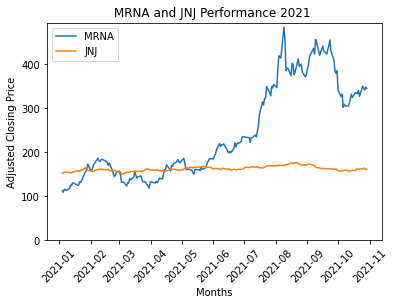

In [59]:
from datetime import datetime
s=datetime(2021,1,1)
e=datetime(2021,11,1)
visualize_stock_data('MRNA', 'JNJ', s, e)

### Expected Output
```
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
             Open   High    Low  Close  AdjClose    Volume
Date                                                      
2021-01-04  107.0  114.0  103.0  112.0     112.0  22439600
2021-01-05  114.0  115.0  107.0  109.0     109.0  15450800
2021-01-06  111.0  117.0  110.0  116.0     116.0  21590900
2021-01-07  120.0  123.0  112.0  115.0     115.0  20614100
2021-01-08  117.0  118.0  111.0  113.0     113.0  12376900 

             Open   High    Low  Close  AdjClose    Volume
Date                                                      
2021-01-04  157.0  157.0  154.0  156.0     152.0  11765900
2021-01-05  156.0  159.0  155.0  158.0     153.0   9602300
2021-01-06  157.0  160.0  157.0  160.0     155.0   8230100
2021-01-07  159.0  161.0  158.0  160.0     155.0   7747200
2021-01-08  161.0  161.0  160.0  160.0     155.0   8228900 
```
![stock_performance](https://drive.google.com/uc?id=1i0V_itOoFMM0gXX9PjocPkihuFpKMQIc)